In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import metrics
from matplotlib import pyplot as plt
from sklearn.datasets import load_boston
%matplotlib inline

In [10]:
boston=load_boston()
data=pd.DataFrame(boston.data)

In [11]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [12]:
data.columns=boston.feature_names
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [13]:
data.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object

In [14]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [15]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [18]:
data['PRICE']=boston.target

In [22]:
data.corr()['PRICE']

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
PRICE      1.000000
Name: PRICE, dtype: float64

In [23]:
data.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
PRICE      229
dtype: int64

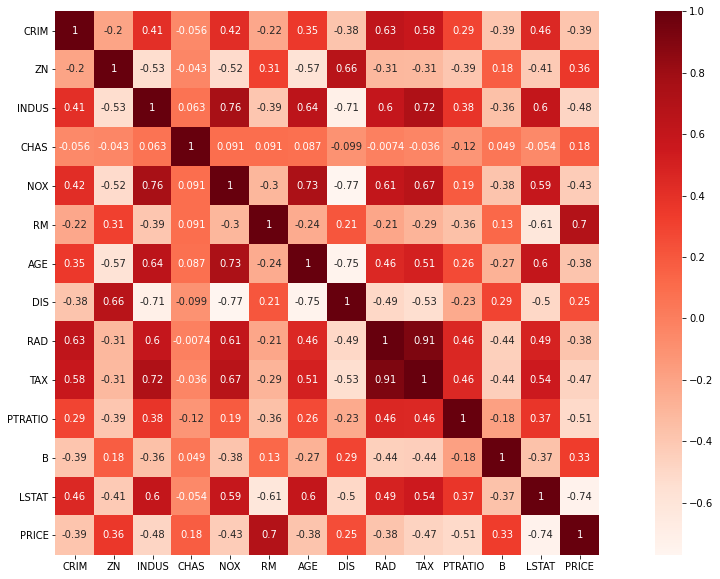

In [28]:
corr=data.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True,linecolor='orange',cbar=True,square=True,cmap='Reds')

In [30]:
x=data.drop(['PRICE'],axis=1)
y=data['PRICE']

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=4)

# **CREATING A LINEAR REGRESSION MODEL**

In [57]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## **MODEL EVALUATION**

In [58]:
# on train data
y_pred=model.predict(x_train)
#R^2 is measure of relationship bw independent and dependent variable
R2=metrics.r2_score(y_train,y_pred)
MAE=metrics.mean_absolute_error(y_train,y_pred)
MSE=metrics.mean_squared_error(y_train,y_pred)
RMSE=np.sqrt(MSE)

In [59]:
print('R2 score: ',R2)
print('mean absolute error: ',MAE)
print('mean square error: ',MSE)
print('root mean squared error: ',RMSE)

R2 score:  0.7465991966746854
mean absolute error:  3.08986109497113
mean square error:  19.07368870346903
root mean squared error:  4.367343437774162


In [62]:
#on test data
y_pred=model.predict(x_test)
R2_lin=metrics.r2_score(y_test,y_pred)
MAE=metrics.mean_absolute_error(y_test,y_pred)
MSE=metrics.mean_squared_error(y_test,y_pred)
RMSE=np.sqrt(MSE)
print('R2 score: ',R2_lin)
print('mean absolute error: ',MAE)
print('mean square error: ',MSE)
print('root mean squared error: ',RMSE)

R2 score:  0.7121818377409187
mean absolute error:  3.8590055923707465
mean square error:  30.053993307124216
root mean squared error:  5.482152251362982


we evaluate models on their r2 score value if r2 score > 0.7 our model will fit well , we can try other models also

# **CREATING RANDOM FOREST REGRESSOR MODEL**

In [64]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [65]:
#on train data
y_pred=model.predict(x_train)

R2_rf=metrics.r2_score(y_train,y_pred)
MAE=metrics.mean_absolute_error(y_train,y_pred)
MSE=metrics.mean_squared_error(y_train,y_pred)
RMSE=np.sqrt(MSE)
print('R2 score: ',R2_rf)
print('mean absolute error: ',MAE)
print('mean square error: ',MSE)
print('root mean squared error: ',RMSE)

R2 score:  0.9802636280232444
mean absolute error:  0.8294491525423726
mean square error:  1.4855730932203404
root mean squared error:  1.2188408810096338


As we can see above our r2 score is much better than previous on train data.
Let's evaluate our model on test data

In [66]:
y_pred=model.predict(x_test)
R2_rf=metrics.r2_score(y_test,y_pred)
MAE=metrics.mean_absolute_error(y_test,y_pred)
MSE=metrics.mean_squared_error(y_test,y_pred)
RMSE=np.sqrt(MSE)
print('R2 score: ',R2_rf)
print('mean absolute error: ',MAE)
print('mean square error: ',MSE)
print('root mean squared error: ',RMSE)

R2 score:  0.8326508771281962
mean absolute error:  2.4929407894736837
mean square error:  17.47460750657895
root mean squared error:  4.180264047471039


our data fits much better on Random Forest Regressor than linear regression model

In [67]:
# creating scaled set to be used in our model to improve result
from sklearn.preprocessing import StandardScaler as sc
sc=sc()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

# **Creating Support vector machine regressor model**

In [68]:
from sklearn import svm
model=svm.SVR()
model.fit(x_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

# **model evaluation**

In [69]:
#on train data
y_pred=model.predict(x_train)
R2_sv=metrics.r2_score(y_train,y_pred)
MAE=metrics.mean_absolute_error(y_train,y_pred)
MSE=metrics.mean_squared_error(y_train,y_pred)
RMSE=np.sqrt(MSE)
print('R2 score: ',R2_sv)
print('mean absolute error: ',MAE)
print('mean square error: ',MSE)
print('root mean squared error: ',RMSE)

R2 score:  0.6419097248941195
mean absolute error:  2.9361501059460293
mean square error:  26.953752101332935
root mean squared error:  5.191700309275655


In [70]:
#on test data
y_pred=model.predict(x_test)
R2_sv=metrics.r2_score(y_test,y_pred)
MAE=metrics.mean_absolute_error(y_test,y_pred)
MSE=metrics.mean_squared_error(y_test,y_pred)
RMSE=np.sqrt(MSE)
print('R2 score: ',R2_sv)
print('mean absolute error: ',MAE)
print('mean square error: ',MSE)
print('root mean squared error: ',RMSE)

R2 score:  0.5900158460478175
mean absolute error:  3.7561453553021678
mean square error:  42.81057499010246
root mean squared error:  6.542979060802691


In [73]:
models=pd.DataFrame({'Model':['Linear regression model','Rendom forest regression model',
                             'support vector machine model'],'R-2 Score':[R2_lin*100,R2_rf*100,R2_sv*100]})
models.sort_values(by='R-2 Score',ascending=False)

,Model,R-2 Score
1,Rendom forest regression model,83.265088
0,Linear regression model,71.218184
2,support vector machine model,59.001585


### **HENCE THE RANDOM FOREST REGRESSOR MODEL WORKS BEST FOR THIS DATA SET**





